<a href="https://colab.research.google.com/github/Alejandro-ZZ/Deep-Learning/blob/master/Multilayer-Perceptron/2_Multiple_Classification_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Classification | Keras

* Using MNIST dataset (numbers from 0 to 9)
* Multiple classification

In [43]:
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import time

## **MNIST Dataset**

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](http://yann.lecun.com/exdb/mnist/).<br><br>

1. **TRAIN SET**

  - **data:** uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

  - **labels:** uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.


2. **TEST SET**
  - **data:** uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

  - **labels:** uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [8]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

print('TRAIN SET:')
print(f'      data: {train_data.shape}')
print(f'    labels: {train_labels.shape}')
print('-'*40)
print('TEST SET:')
print(f'      data: {test_data.shape}')
print(f'    labels: {test_labels.shape}')
print('-'*40)

TRAIN SET:
      data: (60000, 28, 28)
    labels: (60000,)
----------------------------------------
TEST SET:
      data: (10000, 28, 28)
    labels: (10000,)
----------------------------------------


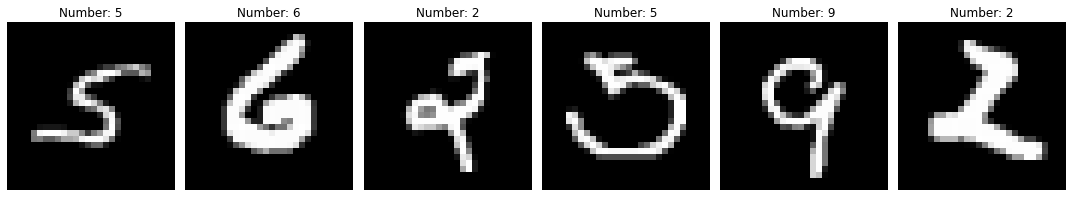

In [34]:
# Get random observation
cols, rows = 6, 1
index_list = list(np.random.randint(0, len(train_data), cols))

# Display image
figure = plt.figure(figsize=(15, 15))
for i, index in enumerate(index_list):
  figure.add_subplot(rows, cols, i+1)
  plt.imshow(train_data[index], 'gray')
  plt.title(f'Number: {train_labels[index]}')
  plt.axis("off")

plt.tight_layout()
plt.show()

## **Data cleaning**

In [35]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## **Training params**

In [51]:
epochs = 10
batch_size = 128

optimizer = 'rmsprop' # 'adam'
loss_fnc = 'categorical_crossentropy'
metrics = ['acc']

## **Model architecture**

In [54]:
# Model's architecture
model_layers = [layers.Dense(256, activation="relu", name='Input_layer', input_shape=(28*28,)),
                layers.Dense(128, activation="relu", name='layer2'),
                layers.Dense(64, activation="relu", name='layer3'),
                layers.Dense(10, activation='softmax', name='Output_layer')]

#Compiling model
model = models.Sequential(layers=model_layers, name='Model1')
model.compile(optimizer=optimizer,
              loss=loss_fnc,
              metrics=metrics)
print(model.summary())

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 256)               200960    
                                                                 
 layer2 (Dense)              (None, 128)               32896     
                                                                 
 layer3 (Dense)              (None, 64)                8256      
                                                                 
 Output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


## **Training model**

In [55]:
# Trining model
start_process_time = time.time()
# ------------------------------------------------------------------------------
results = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.2)
# ------------------------------------------------------------------------------
process_time = time.time() - start_process_time
minutes = process_time / 60
seconds = (minutes - int(minutes)) * 60
print(f'\n[INFO] Total epochs: {epochs}')
print(f"[INFO] Training execution time: {int(minutes)}m {int(seconds)}s\n")

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3072 - acc: 0.9075 - val_loss: 0.1727 - val_acc: 0.9503
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1157 - acc: 0.9643 - val_loss: 0.1175 - val_acc: 0.9657
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0760 - acc: 0.9764 - val_loss: 0.1001 - val_acc: 0.9710
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0539 - acc: 0.9834 - val_loss: 0.0896 - val_acc: 0.9751
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0403 - acc: 0.9868 - val_loss: 0.0962 - val_acc: 0.9747
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0317 - acc: 0.9902 - val_loss: 0.1036 - val_acc: 0.9754
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0255 - acc: 0.9915 - val_loss: 0.1058 - val_acc: 0.9745
Epoch 8/10
375/375 [==============================] - 3s 8ms/step - loss: 0.

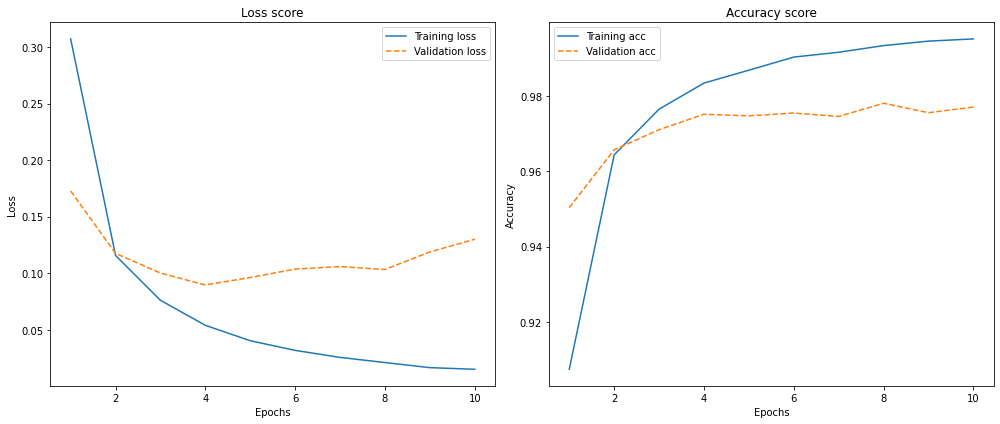

In [56]:
# Get results
results_dict = results.history

# Display training and validation curves
figure = plt.figure(figsize=(14, 6))

figure.add_subplot(1, 2, 1)
plt.plot(range(1, epochs+1), results_dict['loss'], label='Training loss')
plt.plot(range(1, epochs+1), results_dict['val_loss'], '--', label='Validation loss')
plt.title('Loss score')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

figure.add_subplot(1, 2, 2)
plt.plot(range(1, epochs+1), results_dict['acc'], label='Training acc')
plt.plot(range(1, epochs+1), results_dict['val_acc'], '--', label='Validation acc')
plt.title('Accuracy score')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In the *Loss score* figure, the training loss continues to decrease with experience, while the validation loss has decreased to a minimum and has begun to increase. This descrived behavior means that the model is overffited. Possible solutions to this are:

1. **Model capacity:** decrease the number of layers or units (neurons) per layer.

2. **Regularizer:** add weight regularizer like L1, L2.

3. **Dropout:** add *dropout* layers with ranges between 0.2 and 0.5.

4. **Callback:** regularize learning rate as validation loss plateus by adding a callback when fitting the model.


Note that by adding regulizers or dropout layers causes the model to take longer to learn. Because of this, the number of epochs should increase.

## **Evaluating model**

In [58]:
# Evaluates the model
loss_val, metrics_vals = model.evaluate(x_test, y_test)
print(f'[INFO] Loss value: {loss_val}')
print(f'[INFO] Metric values: {metrics_vals}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1128 - acc: 0.9776
[INFO] Loss value: 0.11284428834915161
[INFO] Metric values: 0.9775999784469604


### Predictions

In [83]:
# Get predictions of test observations
print('[INFO] Getting predictions...')
predictions = model.predict(x_test)



# Probability for test observation 0
# position of each probability corresponts 
# to the respective target number
print('\nProbabilities:\n', predictions[0])

# Sum of all prediction of observation 0 
# must be 1 (equivalent to 100% of probability)
print('\nSum of predictions:', np.sum(predictions[0]))

# Get the position with higher probability (final prediction of model)
print('\nFinal prediction:', np.argmax(predictions[0]))

# True value
print('\nActual value:', test_labels[0])

[INFO] Getting predictions...
313/313 [==============================] - 1s 2ms/step

Probabilities:
 [7.7673159e-19 8.3497844e-12 1.1327435e-09 2.3108437e-10 4.1864222e-15
 1.0128843e-15 1.5359461e-21 9.9999994e-01 2.1030931e-13 1.8382058e-10]

Sum of predictions: 0.99999994

Final prediction: 7

Actual value: 7


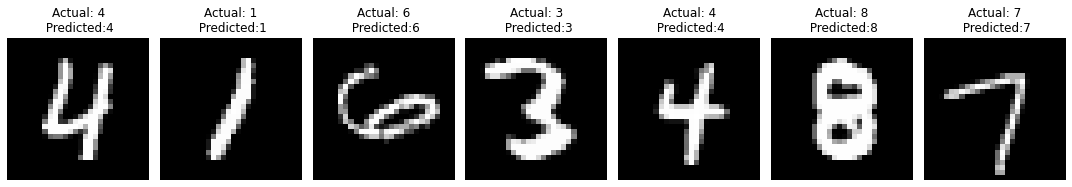

In [87]:
# Grid to plot
rows, cols = 1, 7

# Random test observations
index_list = list(np.random.randint(0, len(test_data), cols))

  
figure = plt.figure(figsize=(15, 15))
for i, index in enumerate(index_list):
  # Get the position with higher probability (final prediction of model)
  predicted = np.argmax(predictions[index])

  figure.add_subplot(rows, cols, i+1)
  plt.imshow(test_data[index], 'gray')
  plt.title(f'Actual: {test_labels[index]}\n Predicted:{predicted}')
  plt.axis('off')

plt.tight_layout()
plt.show()